Leemos el dataset y visualizamos las variables con que se puede trabajar

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("spotify.csv", encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [3]:
df.head()


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


De las variables con las que podemos trabajar podemos notar las primeras 4 son variables no cuantitativas muy variadas, algunas unicas de cada cancion, que no serviran de mucho para el analisis, por lo que las eliminaremos, Tydal popularity se encuentra vacio por lo que tambien se elimina, de las demas podemos identificar "spotify streams" como la variable a predecir con el modelo.

In [4]:
df = df.drop(df.columns[:5], axis=1)
df = df.drop("TIDAL Popularity", axis=1)
df.head()



,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900",...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0
1,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547",...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1
2,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237",...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0
3,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968",...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0
4,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,...,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1


Como existen valores que pandas toma como clase "object" se creo una funcion simple para leerlos y convertirlos a su equivalente en numero, y agregarlo en una columna nueva, los valores nulos se dejan como tal

In [5]:
print("Before conversion")
df.info()
def convert_to_number(value):
    if pd.isna(value):
        return np.nan
    else:
        value_str = str(value).replace(",", "")
        try:
            return int(value_str)
        except ValueError:
            return np.nan


for col in df.columns:
    if df[col].dtype == 'object':


        new_col = col + " - Num"

        df[new_col] = df[col].apply(convert_to_number)
        df = df.drop(col, axis=1)
df = df[sorted(df.columns)]
print("After conversion")
df.info()

Before conversion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   All Time Rank               4600 non-null   object 
 1   Track Score                 4600 non-null   float64
 2   Spotify Streams             4487 non-null   object 
 3   Spotify Playlist Count      4530 non-null   object 
 4   Spotify Playlist Reach      4528 non-null   object 
 5   Spotify Popularity          3796 non-null   float64
 6   YouTube Views               4292 non-null   object 
 7   YouTube Likes               4285 non-null   object 
 8   TikTok Posts                3427 non-null   object 
 9   TikTok Likes                3620 non-null   object 
 10  TikTok Views                3619 non-null   object 
 11  YouTube Playlist Reach      3591 non-null   object 
 12  Apple Music Playlist Count  4039 non-null   float64
 13  AirPlay Spins  

Analisis estadistico
1.   List item
2.   List item



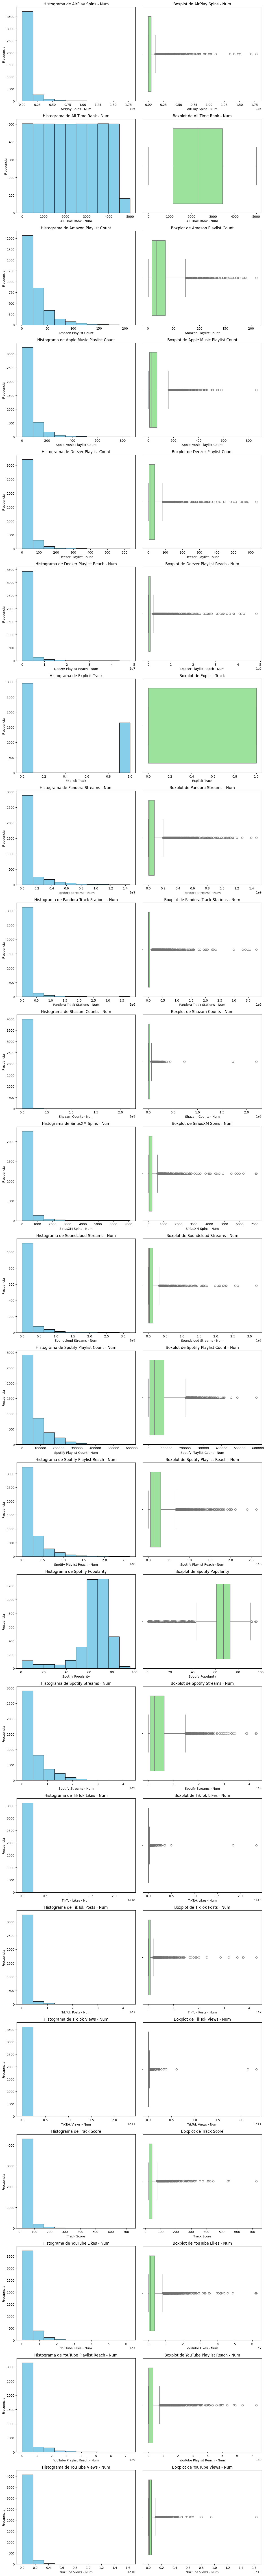

In [6]:
# Definir el número de columnas y filas para subgráficos
num_columns = len(df.columns)
fig, axes = plt.subplots(num_columns, 2, figsize=(12, num_columns * 5))


for i, column in enumerate(df.columns):

    axes[i, 0].hist(df[column], bins=10, color='skyblue', edgecolor='black')
    axes[i, 0].set_title(f'Histograma de {column}')
    axes[i, 0].set_xlabel(f'{column}')
    axes[i, 0].set_ylabel('Frecuencia')


    sns.boxplot(data=df, x=column, ax=axes[i, 1], color='lightgreen')
    axes[i, 1].set_title(f'Boxplot de {column}')


plt.tight_layout()
plt.show()

Observando los histogramas y graficos de caja de cada variable, podemos ver que la mayoria tiene una distribucion muy lejana a la normal , con muchos valores que pueden considerarse "outliers" por tanto se aplicara la normalizacion estandar, que es menos sensible a los mismos, pero antes para decidir con que variables trabajar para la preddcion obtenemos el mapa de calor de sus coeficientes de parson

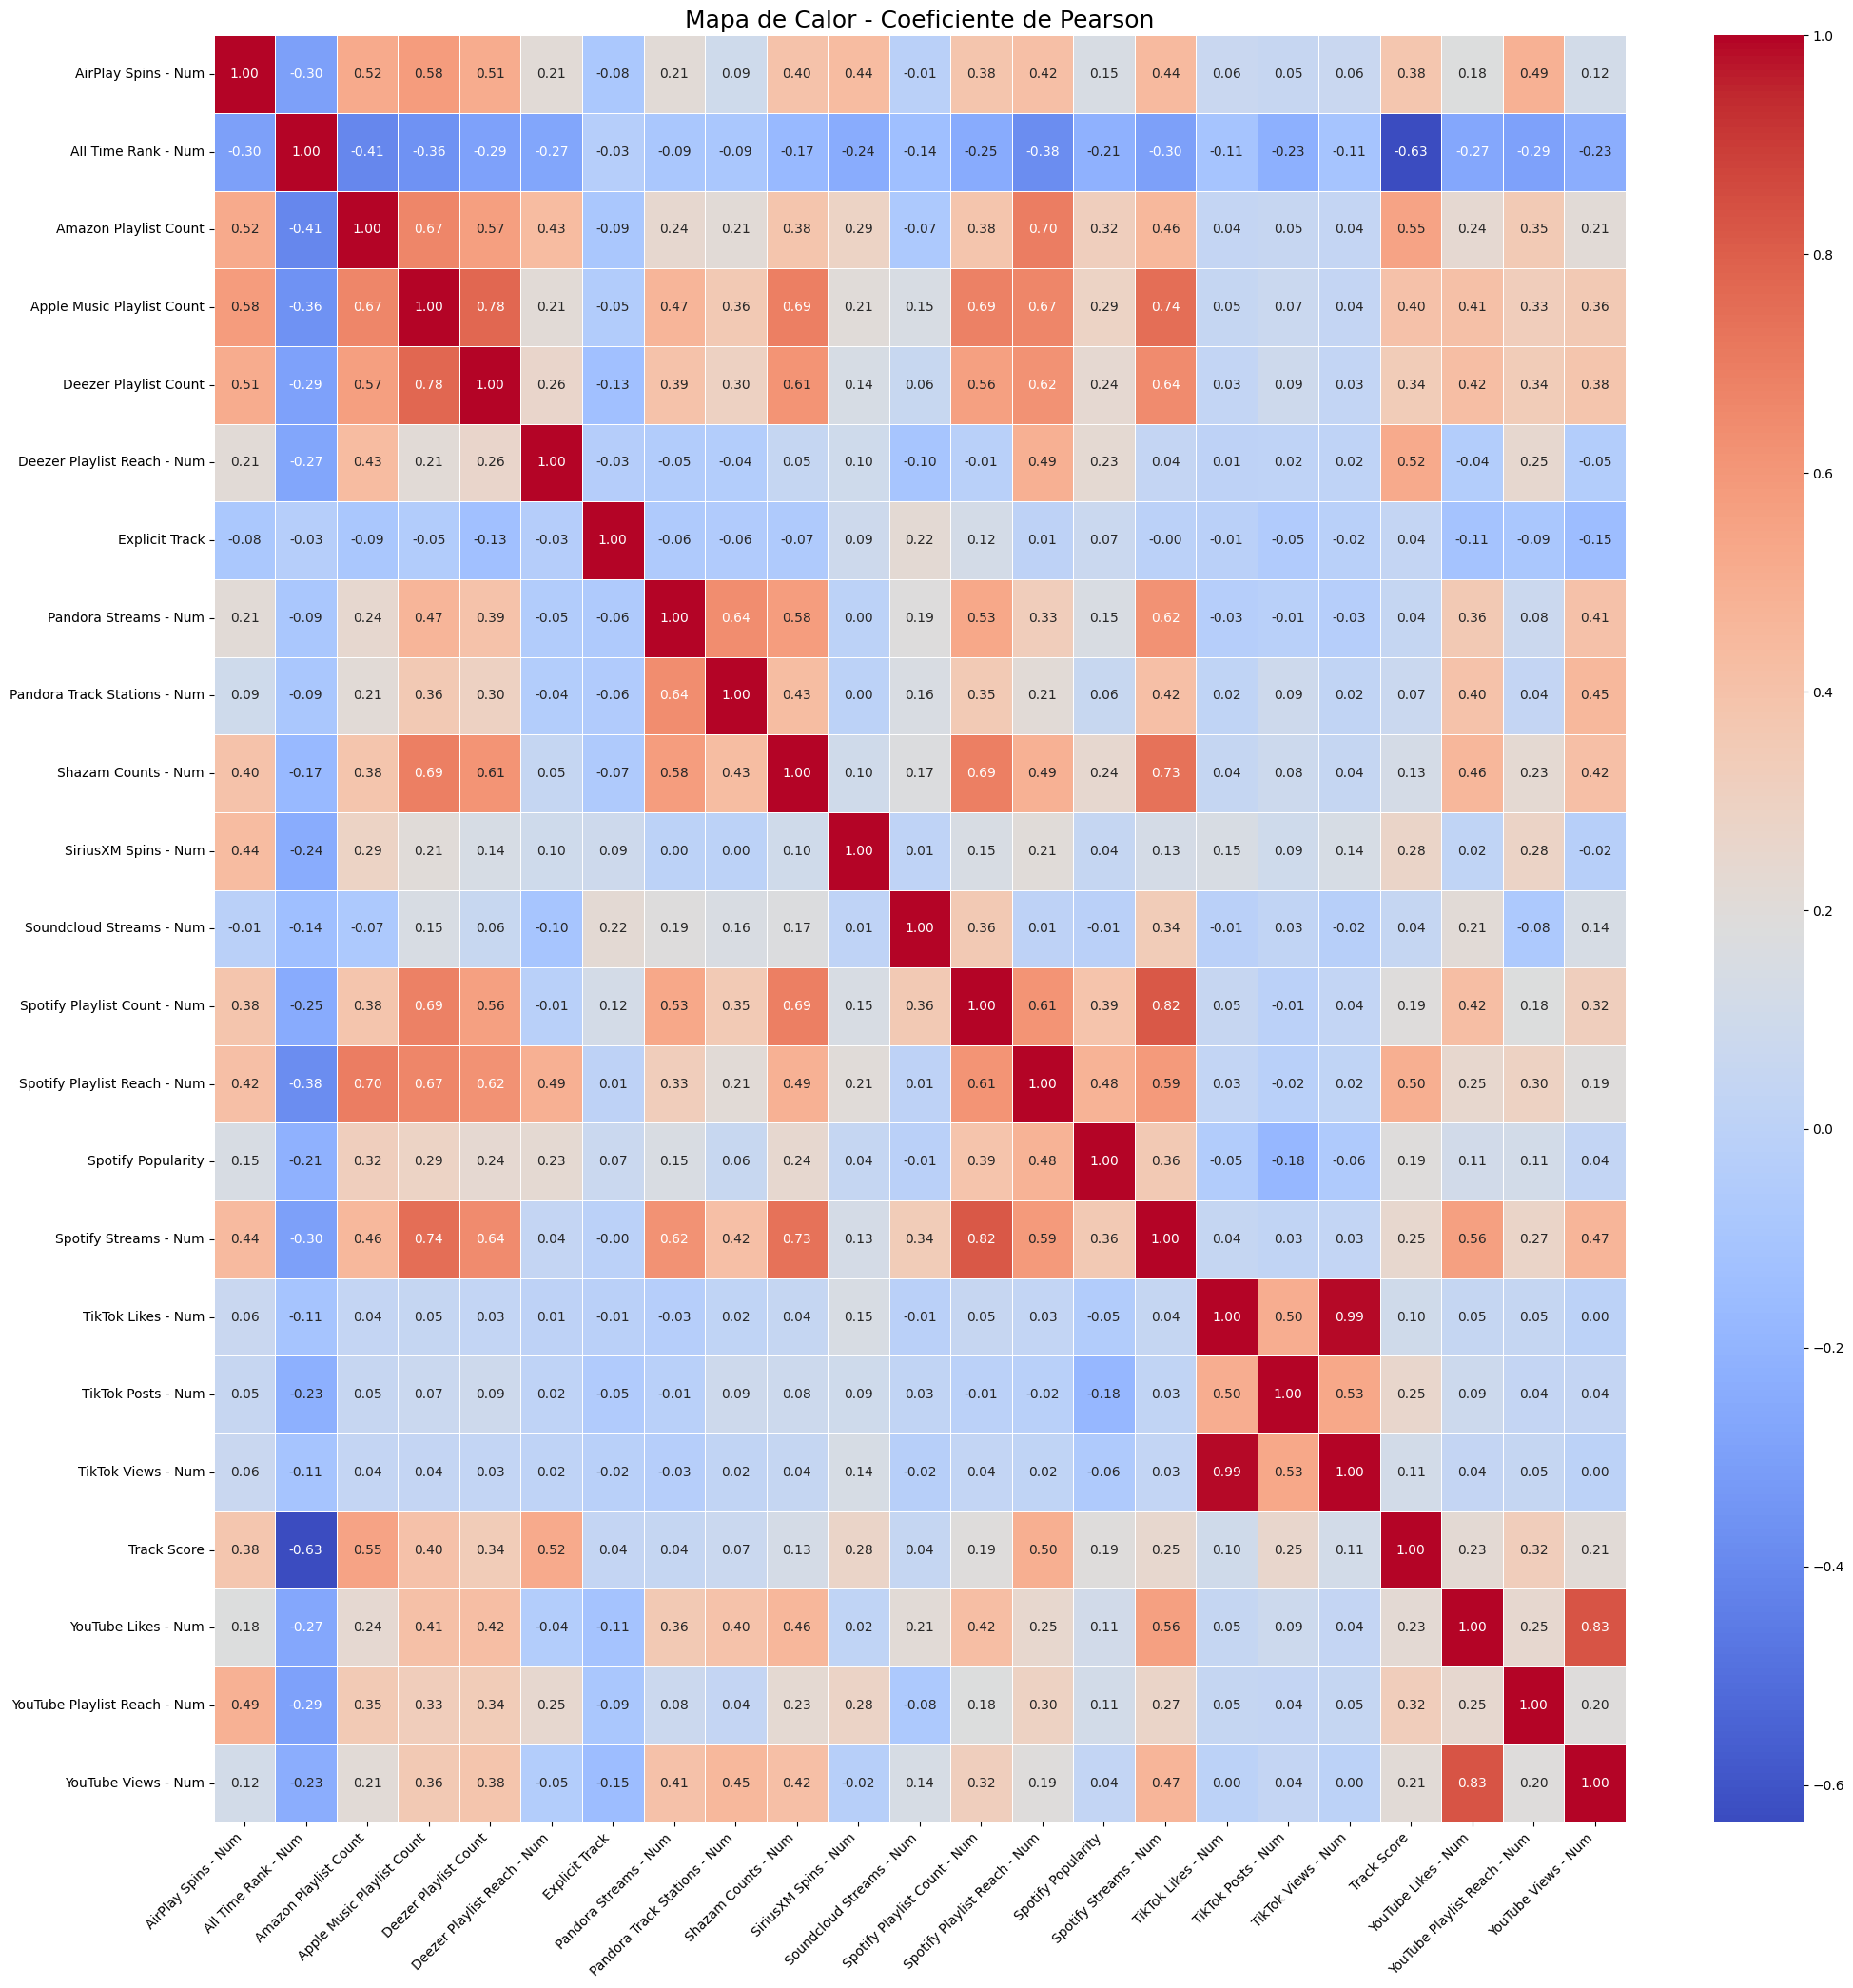

In [7]:
correlation_matrix = df.corr()


plt.figure(figsize=(21, 21))


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)


plt.title('Mapa de Calor - Coeficiente de Pearson', fontsize=18)


plt.xticks(rotation=45, ha="right", fontsize=10)


plt.yticks(rotation=0, fontsize=10)


plt.tight_layout()


plt.show()

De lo anterior podemos observar que la variable con la que Spotify Streams, la variable a predecir, mas relacion tiene es Spotify Playlist Count, con un incide de 0.82. Por lo que trabajaremos con esta como variable independiente en la regresion lineal. Para entrenar el modelo normalizaremos ambas variables con normalizacion estandar, eliminamos las filas que contengan un dato nulo en la variable independiente o dependiente, al no ser utiles para el entrenamiento, y usaremos una porporcion de 70/30 para los datos de entrenamiento y prueba. Despues evaluamos con RMSE  y MAE

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AirPlay Spins - Num           4102 non-null   float64
 1   All Time Rank - Num           4600 non-null   int64  
 2   Amazon Playlist Count         3545 non-null   float64
 3   Apple Music Playlist Count    4039 non-null   float64
 4   Deezer Playlist Count         3679 non-null   float64
 5   Deezer Playlist Reach - Num   3672 non-null   float64
 6   Explicit Track                4600 non-null   int64  
 7   Pandora Streams - Num         3494 non-null   float64
 8   Pandora Track Stations - Num  3332 non-null   float64
 9   Shazam Counts - Num           4023 non-null   float64
 10  SiriusXM Spins - Num          2477 non-null   float64
 11  Soundcloud Streams - Num      1267 non-null   float64
 12  Spotify Playlist Count - Num  4530 non-null   float64
 13  Spo

In [9]:

columns_to_keep = ['Spotify Streams - Num', 'Spotify Playlist Count - Num']
df = df[columns_to_keep]

df = df.dropna(subset=columns_to_keep)



X = df[['Spotify Playlist Count - Num']]
y = df['Spotify Streams - Num']


scaler_X = StandardScaler()
scaler_y = StandardScaler()


X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


y_pred_original = scaler_y.inverse_transform(y_pred)


y_test_original = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)



print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 310352384.03419125
MAE: 183536277.22363377
